In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose


In [6]:
df = pd.read_csv("AAPL_2006-01-01_to_2018-01-01.csv")

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [8]:
# Rows and columns
df.shape

(3019, 7)

In [9]:
# Print all the column names
df.columns.to_list()

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name']

In [10]:
df.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,64.673309,65.256833,64.033445,64.662892,1.311457e+08
std,44.524927,44.811772,44.230829,44.536448,1.018560e+08
min,7.390000,7.560000,7.170000,7.240000,1.147592e+07
25%,23.425000,23.805000,23.015000,23.420000,5.292889e+07
50%,57.860000,58.460000,57.320000,57.920000,1.066271e+08
75%,99.165000,100.275000,98.385000,99.480000,1.798977e+08
max,175.110000,177.200000,174.860000,176.420000,8.432640e+08


In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Creating subplots
fig = make_subplots(rows=2, cols=2, shared_xaxes=True, subplot_titles=['Open Price', 'Close Price', 'High Price', 'Low Price'])

# Adding traces for each line chart
trace1 = px.line(df, x='Date', y='Open')
trace2 = px.line(df, x='Date', y='Close')
trace3 = px.line(df, x='Date', y='High')
trace4 = px.line(df, x='Date', y='Low')

# Adding traces to the subplots
fig.add_trace(trace1.data[0], row=1, col=1)
fig.add_trace(trace2.data[0], row=1, col=2)
fig.add_trace(trace3.data[0], row=2, col=1)
fig.add_trace(trace4.data[0], row=2, col=2)

# Updating layout and axis titles
fig.update_layout(title='Apple Inc. Stock Prices Over Time', height=800, width=1000)
fig.update_xaxes(title_text='Date', row=4, col=1, tickangle=45)
fig.update_yaxes(title_text='Open Price', row=1, col=1)
fig.update_yaxes(title_text='Close Price', row=1, col=2)
fig.update_yaxes(title_text='High Price', row=2, col=1)
fig.update_yaxes(title_text='Low Price', row=2, col=2)

# Show the figure
fig.show()


In [12]:
fig = px.line(df, x = 'Date', y = 'Volume')
fig.update_xaxes(title_text = 'Date')
fig.update_yaxes(title = 'Trading Volume')
fig.update_yaxes(tickangle = 45)
fig.show()


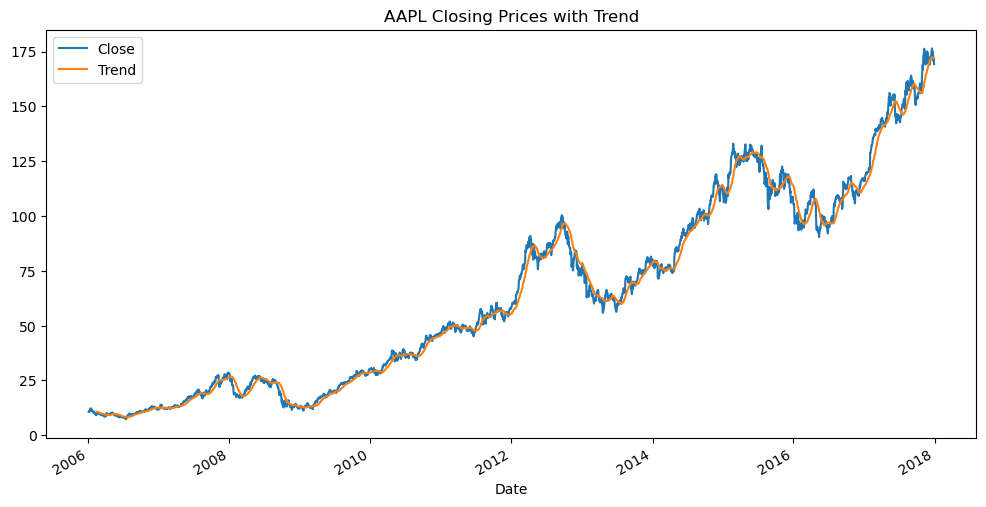

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Trend'] = df['Close'].rolling(window=30).mean()

df[['Close', 'Trend']].plot(figsize=(12,6))
plt.title('AAPL Closing Prices with Trend')
#plt.savefig("plot3.jpg")

In [14]:
df = df.drop(columns = ['Name'])
feature_ranges = df.max() - df.min()
print("Feature Ranges:")
print(feature_ranges)
max_range = feature_ranges.max()
min_range = feature_ranges.min()

if max_range > 1.5 * min_range:
    print("Normalization might be beneficial.")
else:
    print("Normalization may not be necessary.")


Feature Ranges:
Open      1.677200e+02
High      1.696400e+02
Low       1.676900e+02
Close     1.691800e+02
Volume    8.317881e+08
Trend     1.642637e+02
dtype: float64
Normalization might be beneficial.


In [15]:
max_range, min_range

(831788122.0, 164.26366666666667)

In [16]:
scaler = MinMaxScaler()
df_Sc = scaler.fit_transform(df)
df_norm = pd.DataFrame(df_Sc, columns=df.columns)
df_norm.set_index(df.index, inplace=True)

df_norm.head()

,Open,High,Low,Close,Volume,Trend
Date,,,,,,
2006-01-03,0.017589,0.018392,0.018785,0.020333,0.228877,NaN
2006-01-04,0.019914,0.019394,0.020693,0.020511,0.172820,NaN
2006-01-05,0.019676,0.018510,0.020097,0.020038,0.121329,NaN
2006-01-06,0.020033,0.020042,0.020753,0.021634,0.197963,NaN
2006-01-09,0.021285,0.020455,0.021766,0.021397,0.189213,NaN


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
"""
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Plot the distribution by day of the month
sns.histplot(df_norm['Day'], bins=31, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Values by Day of the Month')
axes[0].set_xlabel('Day of the Month')
axes[0].set_ylabel('Frequency')

# Plot the distribution by month of the year
sns.histplot(df_norm['Month'], bins=12, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Values by Month of the Year')
axes[1].set_xlabel('Month of the Year')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
#plt.savefig("plot4.jpg")
"""

'\n# Create subplots\nfig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))\n\n# Plot the distribution by day of the month\nsns.histplot(df_norm[\'Day\'], bins=31, kde=True, ax=axes[0])\naxes[0].set_title(\'Distribution of Values by Day of the Month\')\naxes[0].set_xlabel(\'Day of the Month\')\naxes[0].set_ylabel(\'Frequency\')\n\n# Plot the distribution by month of the year\nsns.histplot(df_norm[\'Month\'], bins=12, kde=True, ax=axes[1])\naxes[1].set_title(\'Distribution of Values by Month of the Year\')\naxes[1].set_xlabel(\'Month of the Year\')\naxes[1].set_ylabel(\'Frequency\')\n\n# Adjust layout\nplt.tight_layout()\n#plt.savefig("plot4.jpg")\n'

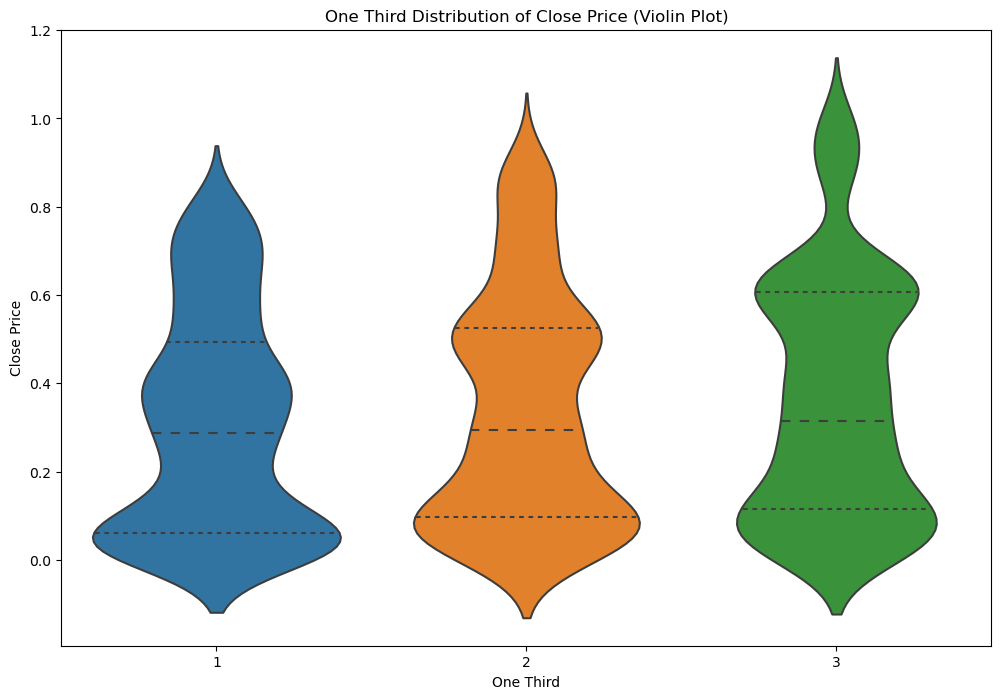

In [ ]:
df_norm['Third'] = (df_norm.index.month - 1) // 4 + 1

plt.figure(figsize=(12, 8))
sns.violinplot(x='Third', y='Close', data=df_norm, inner='quartile')
plt.title('One Third Distribution of Close Price (Violin Plot)')
plt.xlabel('One Third')
plt.ylabel('Close Price')
plt.savefig("plot5")

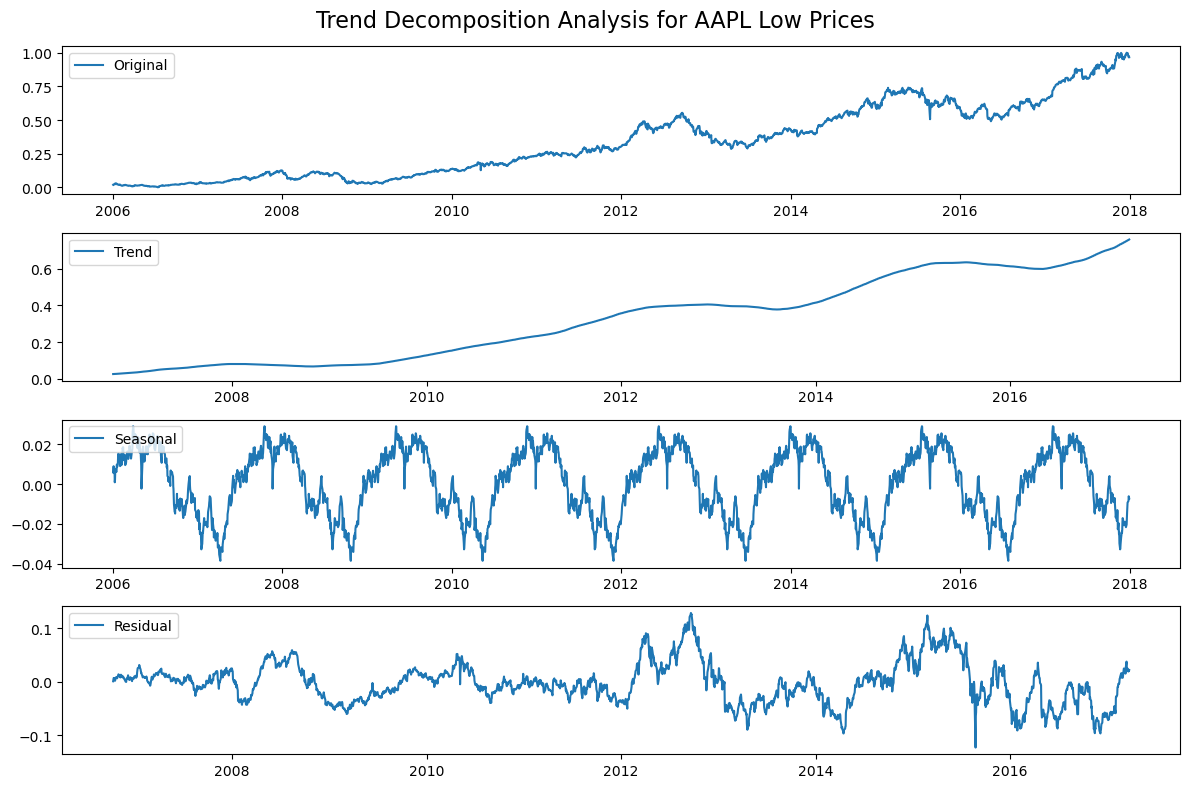

In [19]:
time_series = df_norm['Low'] 

result = seasonal_decompose(time_series, period = 390)

plt.figure(figsize=(12, 8))
plt.suptitle('Trend Decomposition Analysis for AAPL Low Prices', fontsize=16)


plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig("dec1.jpg")

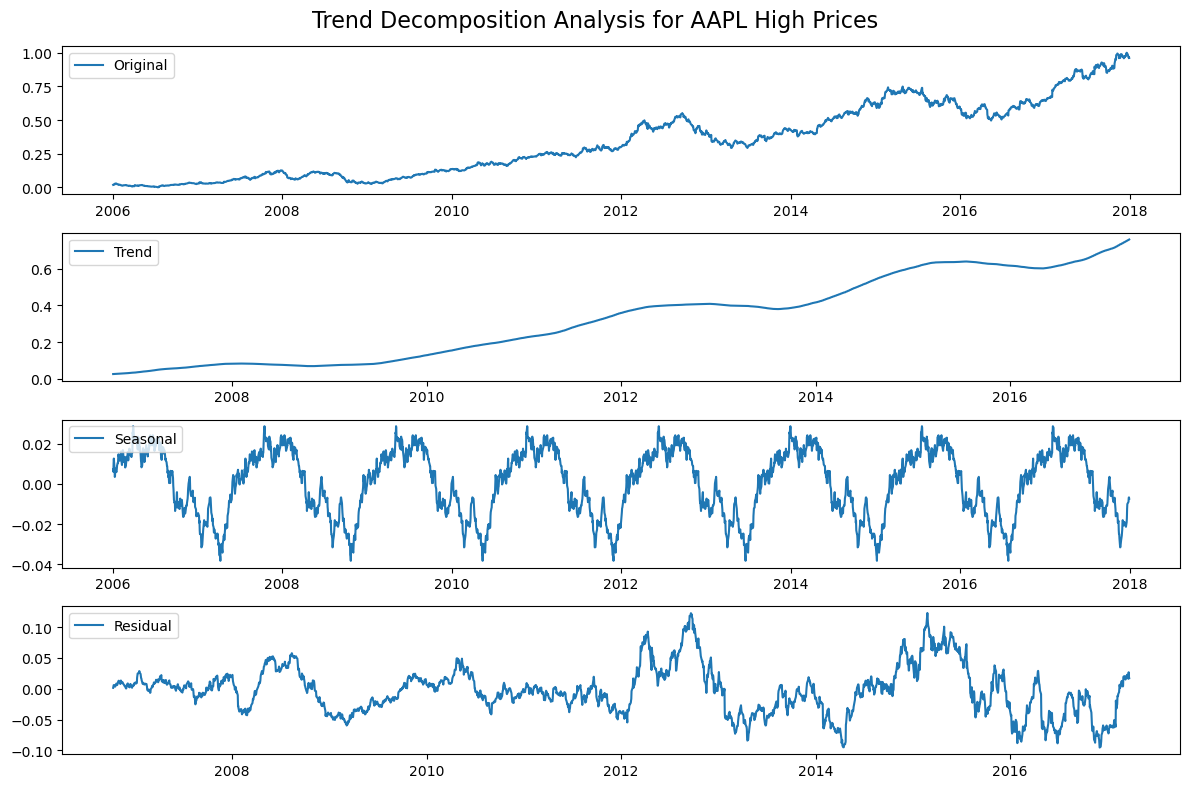

In [20]:
time_series = df_norm['High'] 

result = seasonal_decompose(time_series, period = 390)

plt.figure(figsize=(12, 8))
plt.suptitle('Trend Decomposition Analysis for AAPL High Prices', fontsize=16)


plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig("dec2.jpg")

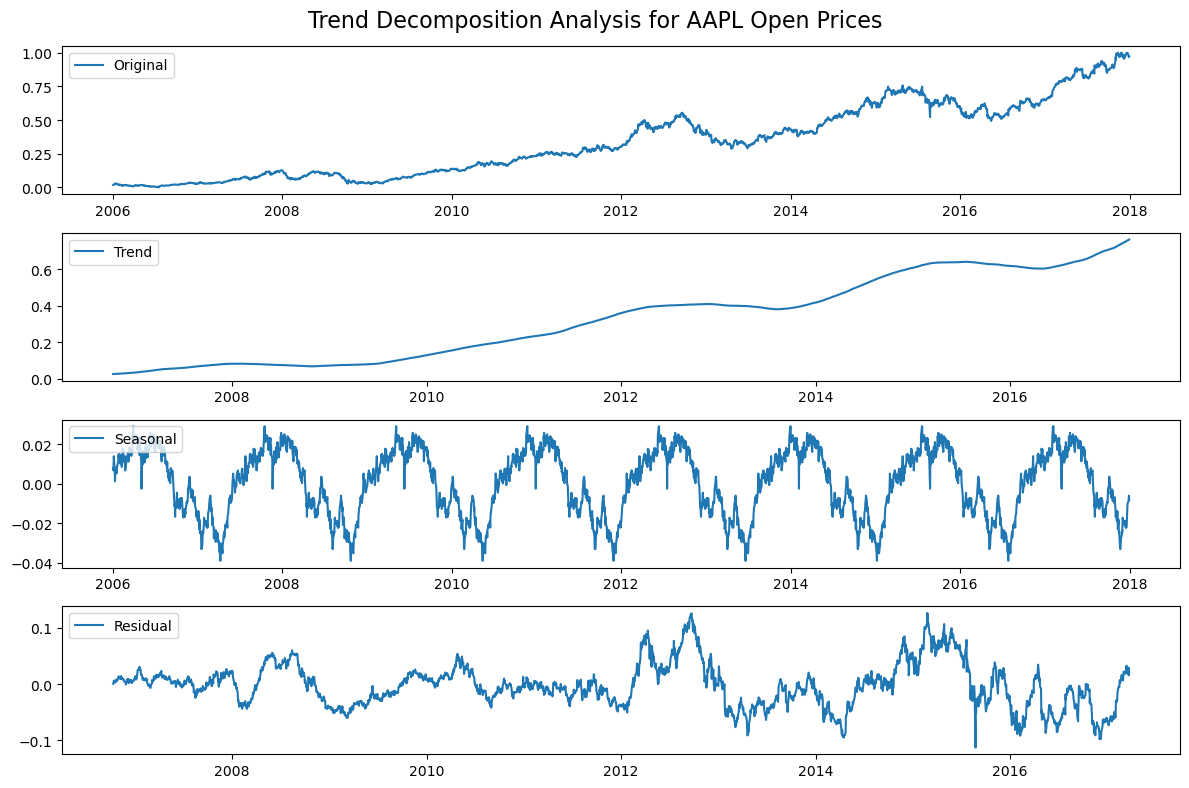

In [ ]:
time_series = df_norm['Open'] 

result = seasonal_decompose(time_series, period = 390)

plt.figure(figsize=(12, 8))
plt.suptitle('Trend Decomposition Analysis for AAPL Open Prices', fontsize=16)


plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig("dec3.jpg")

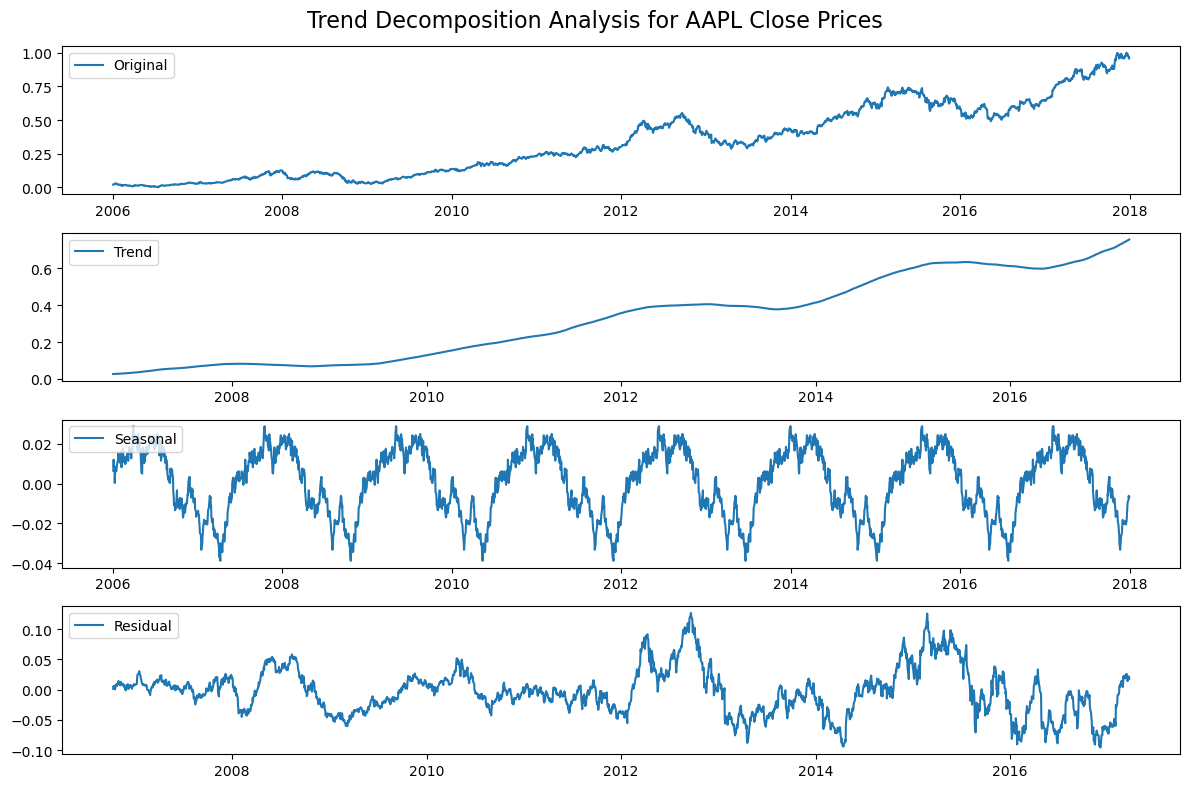

In [21]:
time_series = df_norm['Close'] 

result = seasonal_decompose(time_series, period = 390)

plt.figure(figsize=(12, 8))
plt.suptitle('Trend Decomposition Analysis for AAPL Close Prices', fontsize=16)


plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig("dec4.jpg")

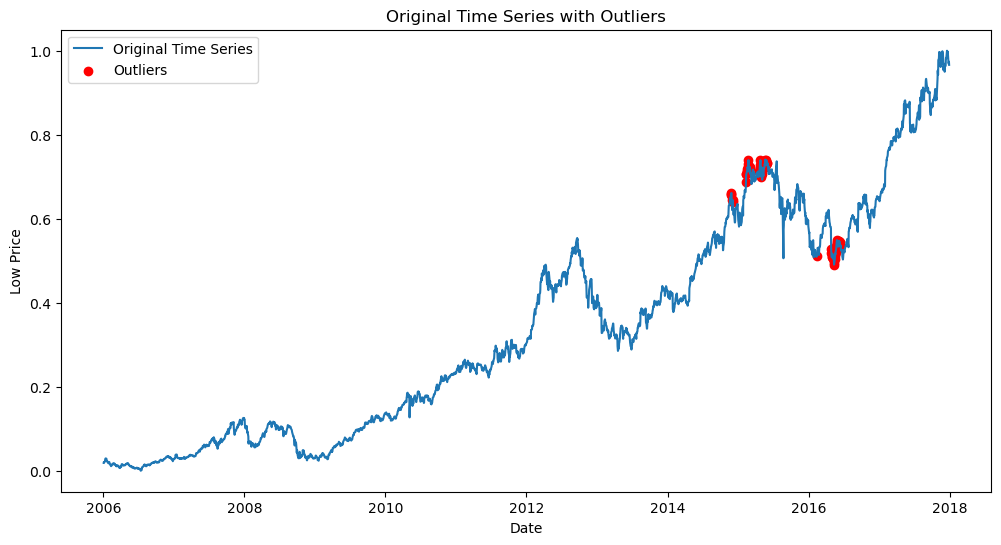

In [23]:
from statsmodels.tsa.seasonal import STL
stl = STL(df_norm['Low'], robust=True, period=390)
res = stl.fit()

num_deviations = 3
residual_mean = np.mean(res.resid)
residual_std = np.std(res.resid)
outliers = np.abs(res.resid - residual_mean) > num_deviations * residual_std

plt.figure(figsize=(12, 6))
plt.plot(df_norm['Low'], label='Original Time Series')

plt.scatter(df_norm.index[outliers], df_norm['Low'][outliers], color='red', marker='o', label='Outliers')

plt.title('Original Time Series with Outliers')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.legend()
#plt.savefig("plot7.jpg")

In [24]:
df_norm = df_norm.drop(columns = ['Trend'])
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
Trend      True
dtype: bool

In [25]:
residual_std

0.07233599174569665

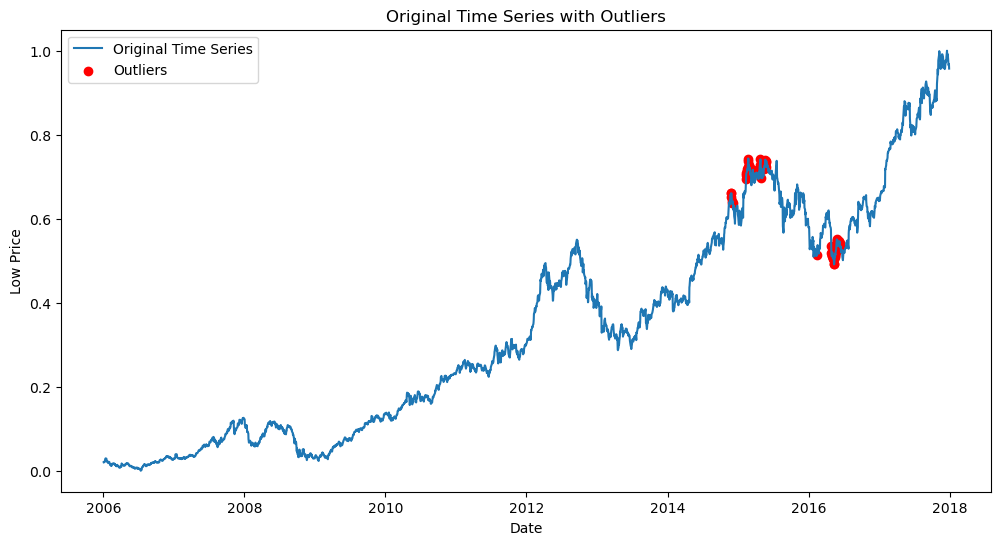

In [26]:
stl = STL(df_norm['Close'], robust=True, period=390)
res = stl.fit()

num_deviations = 3
residual_mean = np.mean(res.resid)
residual_std = np.std(res.resid)
outliers = np.abs(res.resid - residual_mean) > num_deviations * residual_std

plt.figure(figsize=(12, 6))
plt.plot(df_norm['Close'], label='Original Time Series')

plt.scatter(df_norm.index[outliers], df_norm['Close'][outliers], color='red', marker='o', label='Outliers')

plt.title('Original Time Series with Outliers')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.legend()
#plt.savefig("plot8.jpg")